In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
input_file = 'data/Skyserver_SQL3_7_2024 4 14 03 AM.csv'
data = pd.read_csv(input_file, header=1)
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237648721220141175,155.775335,-0.200854,19.44082,17.37083,16.33696,15.88241,15.48007,756,301,3,267,306307754266486784,GALAXY,0.092576,272,51941,229
1,1237648721220010190,155.561088,-0.027246,19.03819,17.79249,17.22686,16.85721,16.63472,756,301,3,265,306316550359508992,GALAXY,0.112591,272,51941,261
2,1237648721220010158,155.541745,-0.055372,19.53143,17.72145,16.83091,16.39734,16.08084,756,301,3,265,305129901462153216,GALAXY,0.071839,271,51883,40
3,1237648721220010121,155.484001,-0.071522,19.52335,17.58873,16.70269,16.24651,15.89563,756,301,3,265,305128252194711552,GALAXY,0.078703,271,51883,34
4,1237648721219813488,155.015866,-0.113941,19.18205,17.14069,16.10541,15.68298,15.29503,756,301,3,262,305139522188896256,GALAXY,0.125382,271,51883,75


In [4]:
num_columns = len(data.columns)
num_rows = len(data)
num_nan = data.isna().sum().sum()

print(f'Number of columns: {num_columns}')
print(f'Number of rows: {num_rows}')
data.info()

Number of columns: 18
Number of rows: 10000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  int64  
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  uint64 
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(

In [5]:
for column in data:
    print(f'{column}: {data[column].unique().size}')

objid: 10000
ra: 10000
dec: 10000
u: 9737
g: 9845
r: 9859
i: 9885
z: 9892
run: 27
rerun: 1
camcol: 6
field: 749
specobjid: 10000
class: 3
redshift: 9978
plate: 487
mjd: 351
fiberid: 875


#### Drop unwanted columns
objid, specobjid are unique IDs, so we can drop them. The rerun column seems to be the same for all the rows, so we will drop it too.

In [6]:
data.drop(['objid', 'specobjid', 'rerun'], axis=1, inplace=True)

The class columns has 3 unique values

<Axes: xlabel='class'>

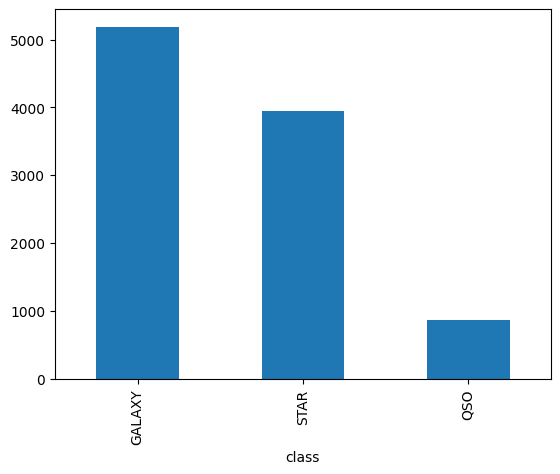

In [7]:
data['class'].value_counts().plot(kind='bar')

We will one hot encode the class column and drop the original column

In [8]:
data['STAR'] = data['class'].map({'STAR': 1, 'GALAXY': 0, 'QSO': 0})
data['GALAXY'] = data['class'].map({'STAR': 0, 'GALAXY': 1, 'QSO': 0})
data['QSO'] = data['class'].map({'STAR': 0, 'GALAXY': 0, 'QSO': 1})

data.drop('class', axis=1, inplace=True)

In [9]:
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,STAR,GALAXY,QSO
0,155.775335,-0.200854,19.44082,17.37083,16.33696,15.88241,15.48007,756,3,267,0.092576,272,51941,229,0,1,0
1,155.561088,-0.027246,19.03819,17.79249,17.22686,16.85721,16.63472,756,3,265,0.112591,272,51941,261,0,1,0
2,155.541745,-0.055372,19.53143,17.72145,16.83091,16.39734,16.08084,756,3,265,0.071839,271,51883,40,0,1,0
3,155.484001,-0.071522,19.52335,17.58873,16.70269,16.24651,15.89563,756,3,265,0.078703,271,51883,34,0,1,0
4,155.015866,-0.113941,19.18205,17.14069,16.10541,15.68298,15.29503,756,3,262,0.125382,271,51883,75,0,1,0


#### Prepare the data for training
We will split the data into training, validation and test sets in a 0.8, 0.1, 0.1 ratio

array([[<Axes: title={'center': 'ra'}>, <Axes: title={'center': 'dec'}>,
        <Axes: title={'center': 'u'}>, <Axes: title={'center': 'g'}>],
       [<Axes: title={'center': 'r'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'run'}>],
       [<Axes: title={'center': 'camcol'}>,
        <Axes: title={'center': 'field'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>],
       [<Axes: title={'center': 'mjd'}>,
        <Axes: title={'center': 'fiberid'}>, <Axes: >, <Axes: >]],
      dtype=object)

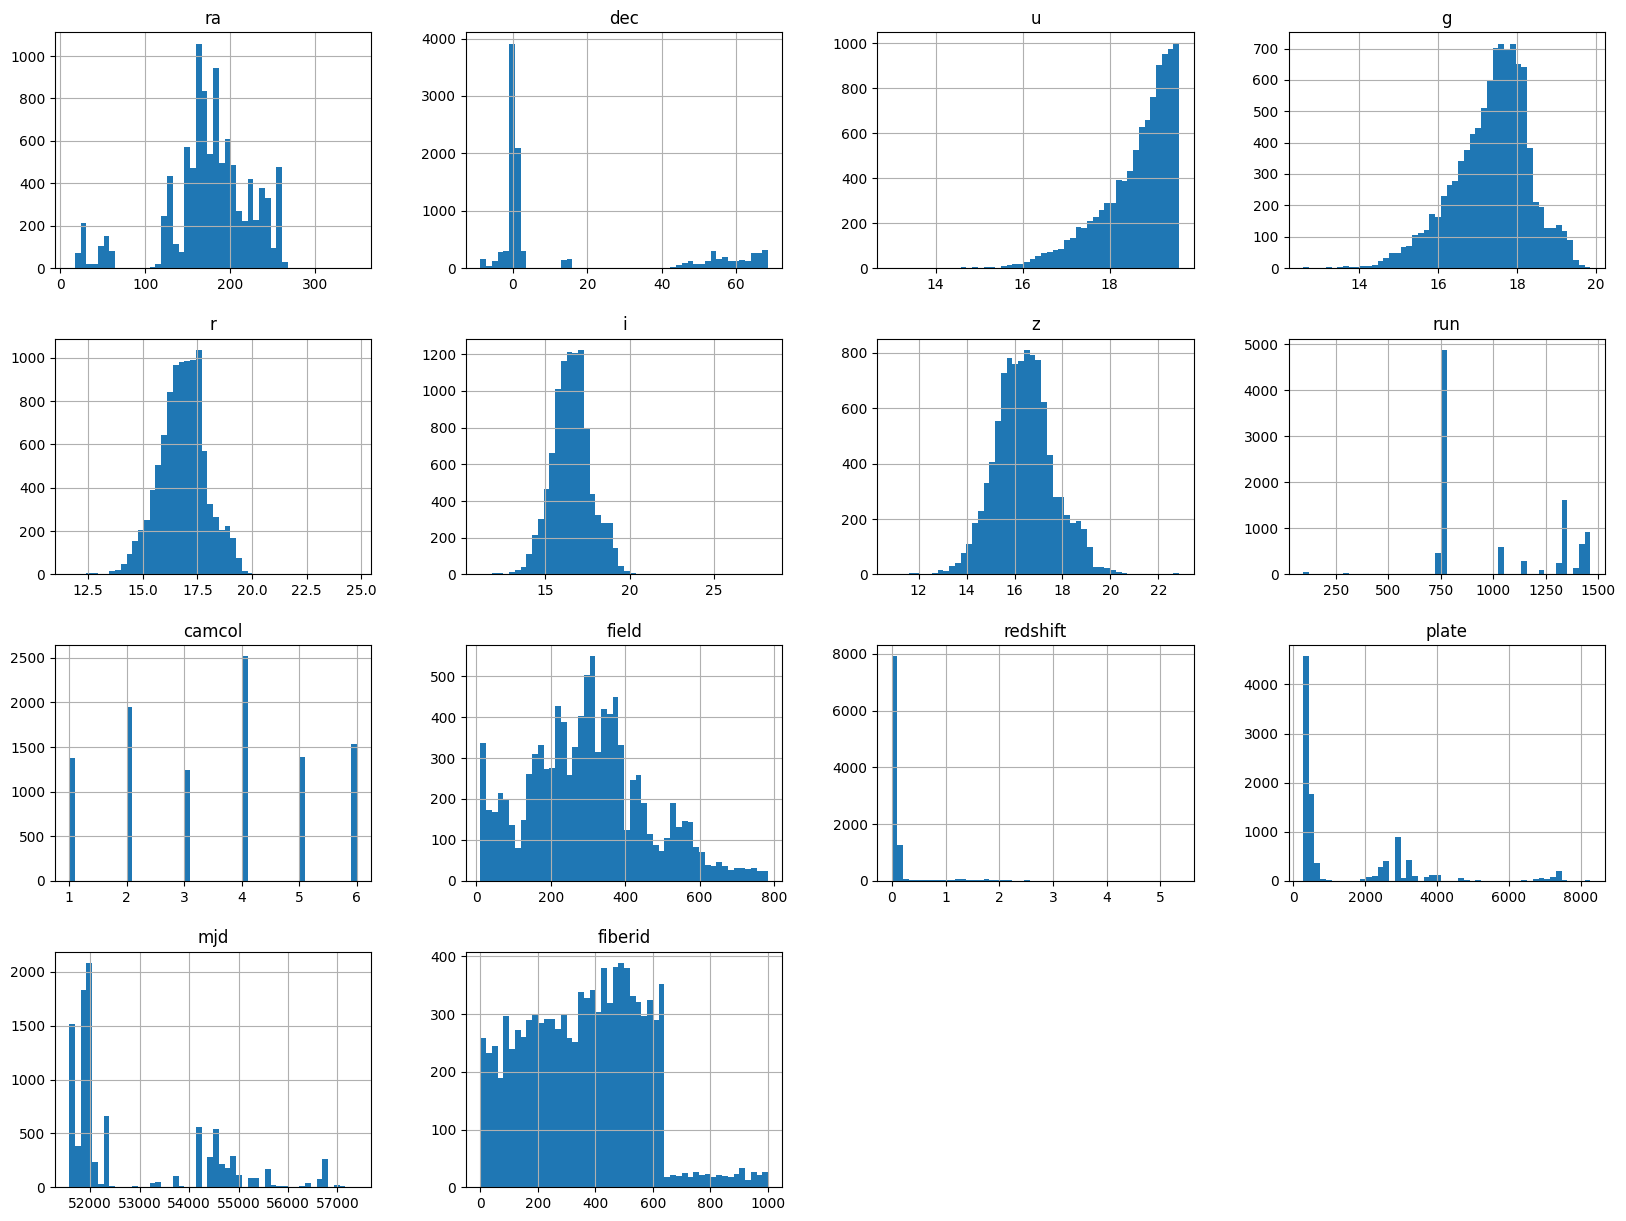

In [10]:
data.drop(['STAR', 'GALAXY', 'QSO'], axis=1).hist(bins=50, figsize=(20, 15))

In [11]:
data = data.sample(frac=1)

n = int(num_rows * 0.8)
m = int(num_rows * 0.9)

train_data = data[:n]
val_data = data[n:m]
test_data = data[m:]

In [12]:
len(train_data), len(val_data), len(test_data)

(8000, 1000, 1000)

Seperate the features and targets from the data splits

In [13]:
X_train= train_data.drop(['STAR', 'GALAXY', 'QSO'], axis=1)
X_train = (X_train - X_train.mean()) / X_train.std()
Y_train = train_data[['STAR', 'GALAXY', 'QSO']]

X_val = val_data.drop(['STAR', 'GALAXY', 'QSO'], axis=1)
X_val = (X_val - X_val.mean()) / X_val.std()
Y_val = val_data[['STAR', 'GALAXY', 'QSO']]

X_test = test_data.drop(['STAR', 'GALAXY', 'QSO'], axis=1)
Y_test = test_data[['STAR', 'GALAXY', 'QSO']]
X_test = (X_test - X_test.mean()) / X_test.std()

In [14]:
import numpy as np
import tensorflow as tf
import random

2024-03-07 10:43:42.131496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 10:43:42.131540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 10:43:42.132531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 10:43:42.137215: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 10:43:42.825573: W tensorflow/compiler/tf2

In [15]:
!nvidia-smi

Thu Mar  7 10:43:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0             752W /  80W |      6MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, activation='sigmoid', input_shape=(14,)),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 150)               2250      
                                                                 
 dense_6 (Dense)             (None, 150)               22650     
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 3)                 453       
                                                                 
Total params: 70653 (275.99 KB)
Trainable params: 70653 (275.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/50


250/250 [==============================] - 1s 2ms/step - loss: 0.5979 - accuracy: 0.7389 - val_loss: 0.3212 - val_accuracy: 0.8840
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.9095 - val_loss: 0.2476 - val_accuracy: 0.9150
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9291 - val_loss: 0.1797 - val_accuracy: 0.9330
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9566 - val_loss: 0.1060 - val_accuracy: 0.9730
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1322 - val_accuracy: 0.9500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9619 - val_loss: 0.1488 - val_accuracy: 0.9430
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9726 - val_loss: 0.1143 - val_accuracy: 0.9630
Epoch 8/50
250/25

In [24]:
history_dict = history.history

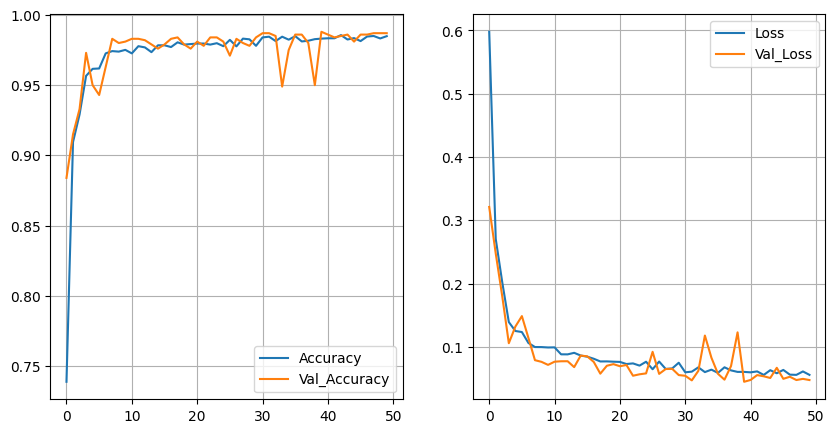

In [25]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Loss')
plt.plot(history_dict['val_loss'], label='Val_Loss')
plt.legend()
plt.grid()
plt.show()

#### Test the model with the test set

In [26]:
Y_pred = model.predict(X_test)

32/32 [==============================] - 0s 649us/step


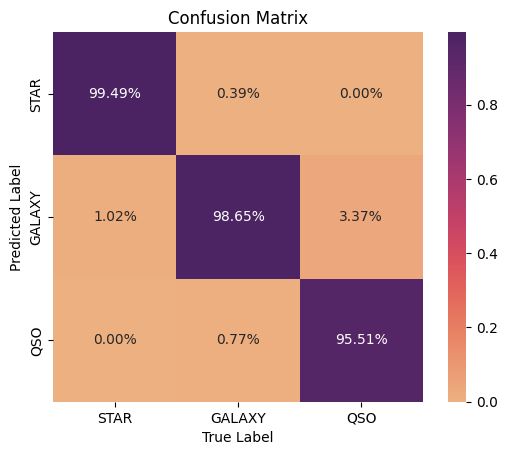

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['STAR', 'GALAXY', 'QSO']
matrix = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))
m = matrix / matrix.sum(axis=1)

plt.title('Confusion Matrix')
ax = sns.heatmap(m, annot=True, fmt='.2%', cmap='flare')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")

plt.imshow(matrix, cmap='coolwarm')